In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

In [124]:
np.random.seed(18)
means = [[2,2], [8,3], [3, 6]] #kì vọng
cov = [[1,0],[0,1]] #ma trận hiệp phương sai
N=500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0,X1,X2), axis=0)
K = 3
original_label = np.asarray([0]*N + [1]*N+ [2]*N)
X.shape

(1500, 2)

In [117]:
#khởi tạo các tâm cụm
def kmeans_init_centroids(X,k):
    # chọn ngẫu nhiên k hàng của X là tâm cụm
    # replace=false: chỉ được chọn điểm đó 1 lần
    return X[np.random.choice(X.shape[0],k, replace=False)]

#tìm nhãn mới cho các điểm khi biết tâm cụm
def kmeans_assign_labels(X, centroids):
    # tính khoảng cách của từng điểm trong X với tâm cụm 
    # trả về ma trận khoảng cách 
    D = cdist(X, centroids)
    # trả về một list các index của phần tử nhỏ nhất trong mỗi hàng của ma trận D
    return np.argmin(D, axis=1)

#cập nhật các tâm cụm khi biết nhãn của từng điểm 
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # lấy tất cả những điểm được gán cho cụm thứ k
        Xk = X[labels==k,:]
        # lấy trung bình của tất cả các điểm
        centroids[k,:] = np.mean(Xk, axis=0)
    return centroids

#kiểm tra điều kiện dừng
def has_converged(centroids, new_centroids):
    # trả về true nếu 2 set giống nhau
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

    

In [118]:
def kmeans(X,K):
    # chọn K điểm bất kỳ làm tâm cụm ban đầu  
    centroids = [kmeans_init_centroids(X,K)] # list chứa centroid
    #print(f"centroids = {centroids}")
    labels = []
    it=0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        #print(f"label = {labels}")
        #print(f"label[-1]= {labels[-1]}, \n label[-1].shape = {labels[-1].shape}")
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        #print(f"centroids[-1]= {centroids[-1]}")
        it+=1
        #print("==================\n")
    return centroids,labels, it 

In [119]:
centroids, labels, it = kmeans(X,K)
print(f"centers: \n{centroids[-1]}, \n label = {labels[-1]}, \n it = {it}")

centers: 
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]], 
 label = [0 2 2 ... 0 0 0], 
 it = 7


In [127]:
correct = sum(original_label==labels[-1])
ac = correct/len(original_label)
ac
len(labels[-1])
X[0]

array([2.07942844, 4.19020236])

In [ ]:
'''
fig, ax = plt.subplots(1,1,figsize=(15,8))
label0 = labels[-1] == 0
label1 = labels[-1]  == 1
label2 = labels[-1] == 2

ax.scatter(X[label0,0], X[label0,1], marker='x', c='r', s=80, label = 'label=0')
ax.scatter(X[label1,0], X[label1,1], marker='o', s=80, label = 'label=1', facecolors='None', edgecolors='gray', lw=3)
ax.scatter(X[label2,0], X[label2,1], marker='^', s=80, label = 'label=2', facecolors='None', edgecolors='g', lw=3)
ax.legend(loc='upper right')
ax.scatter(centroids[-1][0,0], centroids[-1][0,1], marker='x', c='black', s=240, lw=12)
ax.scatter(centroids[-1][1,0], centroids[-1][1,1], marker='o', c='black', s=240, lw=12)
ax.scatter(centroids[-1][2,0], centroids[-1][2,1], marker='^', c='black', s=240, lw=12)


ax.axis([np.min(X[:,0])-1, np.max(X[:,0]+1), np.min(X[:,1])-1, np.max(X[:,1])-1])
ax.set_xlabel('x')
ax.set_ylabel('y')

x_min, x_max = X[:,0].min() -1, X[:,0].max()+1
y_min, y_max = X[:,1].min() -1, X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([np.argmin(np.linalg.norm(centroids[-1] - np.array([x,y]), axis=1)) for x,y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z, alpha=0.3)
plt.show
'''

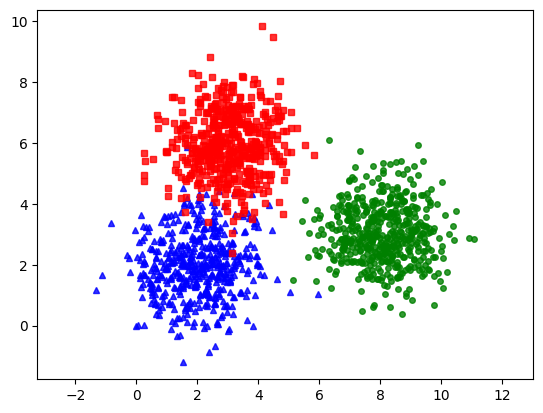

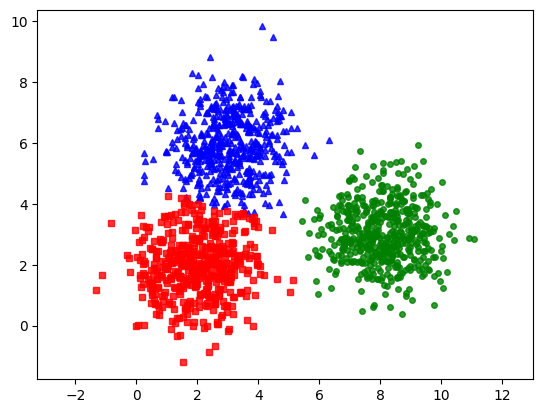

In [135]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)
kmeans_display(X, labels[-1])